# Machine Learning Practice
## Build Decision Tree Classifier using Scikit-learn

Preparing a Training Set and Training a Decision Tree

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

Two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%).

In [16]:
import pandas as pd
import os

cwd = os.getcwd()
doc = cwd+"/data/cell2cell_data.csv"
df = pd.read_csv(doc, header=None, sep=',', names=['revenue','outcalls','incalls','months','eqpdays','webcap','marryyes','travel','pcown','creditcd','retcalls','churndep' ])
df.index += 1
train_df=df.sample(frac=0.8).sort_index(ascending=True)
test_df=df.sample(frac=0.2).sort_index(ascending=True)

Bin the indices and you can see the number of items to prove to ourselves or a colleague that our data was indeed randomly sampled on X. In each bin you can see is generally about the same.

In [17]:
import numpy as np
train_df['revenue'].groupby(pd.cut(train_df.index, np.arange(1000, 39859, 2000))).count()

(1000, 3000]      1606
(3000, 5000]      1589
(5000, 7000]      1595
(7000, 9000]      1599
(9000, 11000]     1618
(11000, 13000]    1602
(13000, 15000]    1602
(15000, 17000]    1608
(17000, 19000]    1613
(19000, 21000]    1567
(21000, 23000]    1620
(23000, 25000]    1611
(25000, 27000]    1593
(27000, 29000]    1604
(29000, 31000]    1570
(31000, 33000]    1613
(33000, 35000]    1591
(35000, 37000]    1617
(37000, 39000]    1612
Name: revenue, dtype: int64

In [18]:
test_df['revenue'].groupby(pd.cut(test_df.index, np.arange(1000, 39859, 2000))).count()

(1000, 3000]      378
(3000, 5000]      414
(5000, 7000]      400
(7000, 9000]      434
(9000, 11000]     427
(11000, 13000]    410
(13000, 15000]    386
(15000, 17000]    355
(17000, 19000]    398
(19000, 21000]    400
(21000, 23000]    410
(23000, 25000]    432
(25000, 27000]    361
(27000, 29000]    405
(29000, 31000]    405
(31000, 33000]    401
(33000, 35000]    412
(35000, 37000]    391
(37000, 39000]    379
Name: revenue, dtype: int64

Build and train a decision tree classifier using `DecisionTreeClassifier()`

In [19]:
import sklearn
from sklearn.tree import DecisionTreeClassifier

y_axis = train_df['churndep']
x_axis = train_df.drop('churndep', 1)
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(x_axis, y_axis)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Plot feature names and their feature importance 

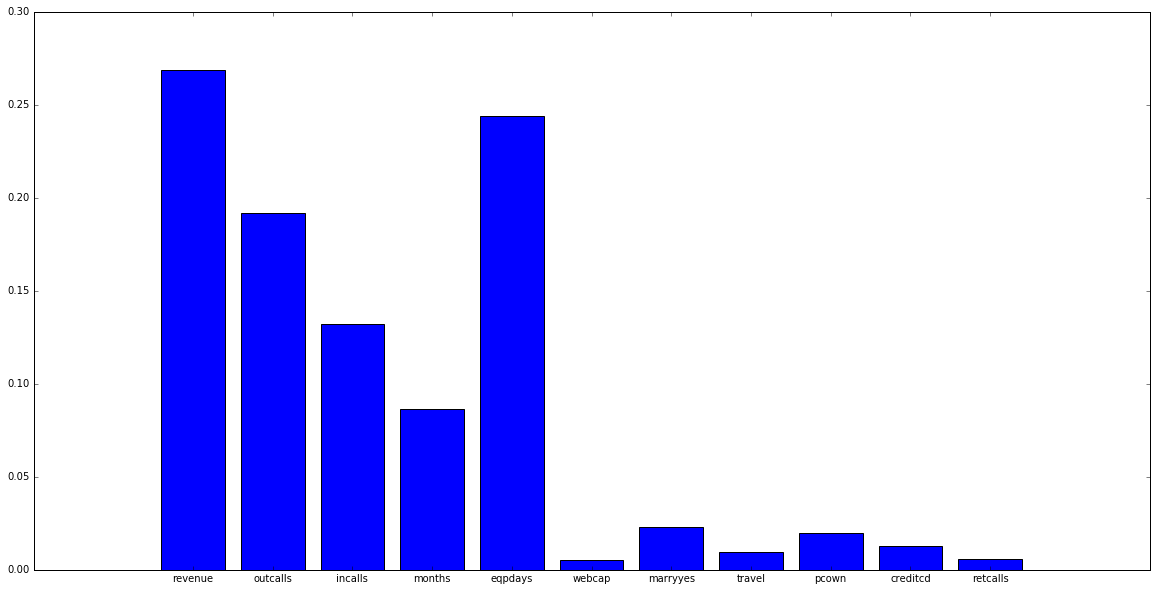

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

features = x_axis.columns
feature_importances = dt.feature_importances_

plt.figure(figsize=(20,10))
plt.bar(range(len(feature_importances)), feature_importances, align='center', width=0.8)
plt.xticks(range(len(features)), features)
plt.show()

In [21]:
import scipy

importance_list = pd.DataFrame(feature_importances,index=features,columns=["feature_importances"])
factors = importance_list.sort_values(by='feature_importances', axis=0, ascending=False)[0:4].index

cor_dict={}

for i in factors:
    cor = scipy.stats.pearsonr(df[i], df['churndep'])
    cor_dict[i]=cor

cor_dict

{'eqpdays': (0.11273099331643338, 7.1757895400168627e-113),
 'incalls': (-0.042030982085479285, 4.6663334045344063e-17),
 'outcalls': (-0.037233028525035905, 1.0392561778224583e-13),
 'revenue': (-0.01356608186764215, 0.0067594265290888706)}

There are strong and positive relations between variable 'eqpdays' and churn rate, 
meaning the longer the customer has had his/her current equipment, the easier the customer would leave.
'incalls' has negative relations with churn rate and the correlation is also very significant.
'outcalls' and 'revenue' have negative relations as well but not as significant as the two variables mentioned above.
In conclusion, monitor 'eqpdays' and 'incalls' closely and try to control the 'eqpdays' and encourage  

Predict `"churndep"` on both the train_df and test_df data sets and find out the accuracy on each.

In [62]:
y_test = test_df['churndep']
x_test = test_df.drop('churndep', 1)

pre_train = dt.predict(x_axis, check_input=True)
pre_test = dt.predict(x_test, check_input=True)

train_accuracy = dt.score(x_axis, y_axis, sample_weight=None)
test_accuracy = dt.score(x_test, y_test, sample_weight=None)

In [63]:
pre_train

array([1, 1, 1, ..., 0, 0, 0])

In [64]:
pre_test

array([1, 1, 1, ..., 0, 0, 0])

In [65]:
train_accuracy

0.99984319628688811

In [66]:
test_accuracy

0.90792774711490221

Prune the tree to find a good Decision Tree by adjust the parameters

Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

min_samples_split : int, float, optional (default=2)
The minimum number of samples required to split an internal node:
If int, then consider min_samples_split as the minimum number.
If float, then min_samples_split is a percentage and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
Changed in version 0.18: Added float values for percentages.
min_samples_leaf : int, float, optional (default=1)
The minimum number of samples required to be at a leaf node:
If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
Changed in version 0.18: Added float values for percentages.

In [87]:
ran = list(range(12))
min_samples_split = ran[2:]
min_samples_leaf = ran[1:-1]

In [140]:
import matplotlib.pyplot as plt
%matplotlib inline

acc_dict={}
for lv in min_samples_leaf:
    accuracy = {}
    for sv in min_samples_split:
        dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = sv, min_samples_leaf = lv)
        dt.fit(x_axis, y_axis)
        test_accuracy = dt.score(x_test, y_test, sample_weight=None)
        accuracy[sv]=test_accuracy
    acc_dict[lv] = accuracy

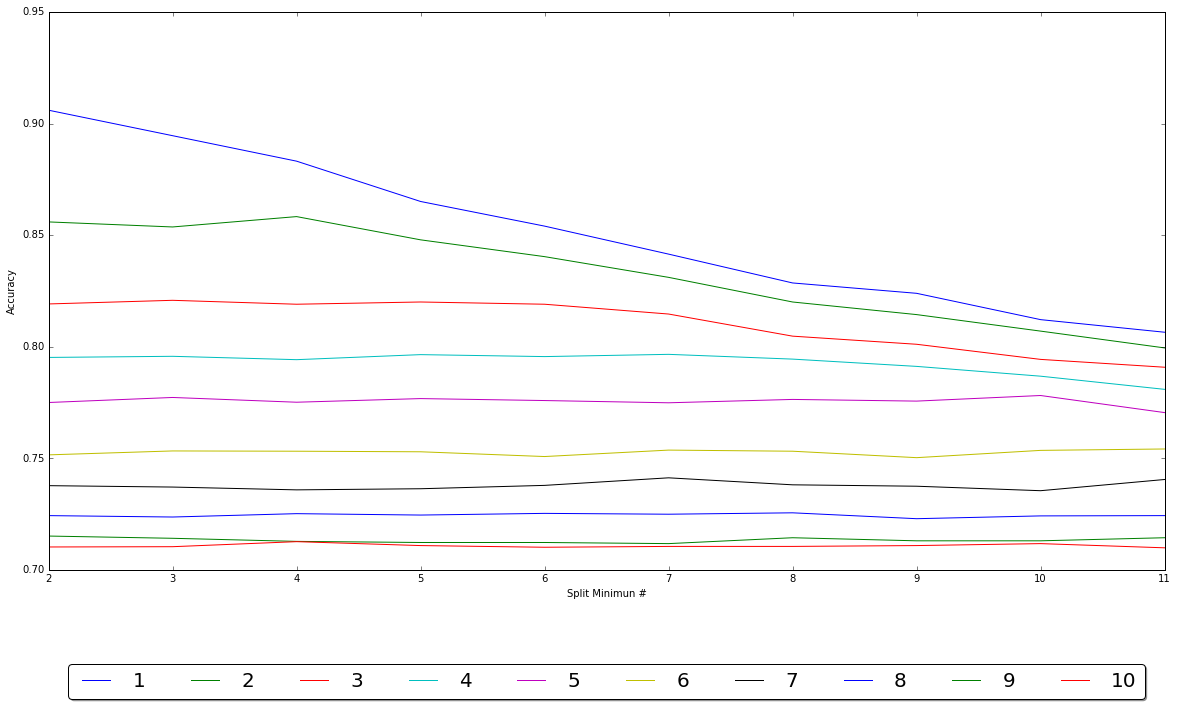

In [147]:
plt.figure(figsize=(20,10))

for i in min_samples_leaf:
    plt.plot(list(acc_dict[i].keys()), list(acc_dict[i].values()))

plt.ylabel('Accuracy')
plt.xlabel('Split Minimun #')

plt.legend(list(acc_dict.keys()), loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, shadow = True, ncol = 10, prop = {'size':20})


In [146]:
# When Min # of split is 2 and leaf is 1, accuracy is the highest

dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 2, min_samples_leaf = 1)        
dt.fit(x_axis, y_axis)
accuracy_best = dt.score(x_test, y_test, sample_weight=None)
accuracy_best

0.90642247867536374